# Name : Sakshi Deepak Shimpi
# Task 1 : Iris flower Classification

In [ ]:
# Importing Flower
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing dataset file
df=pd.read_csv('/content/drive/MyDrive/Oasis Data Science internship/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Getting information about dataset
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Describing about dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Shape of the dataset
df.shape

(150, 6)

In [ ]:
# I drop the specific column which is not important
df.drop('Id',axis=1,inplace=True)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Count the value
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
# Finding null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

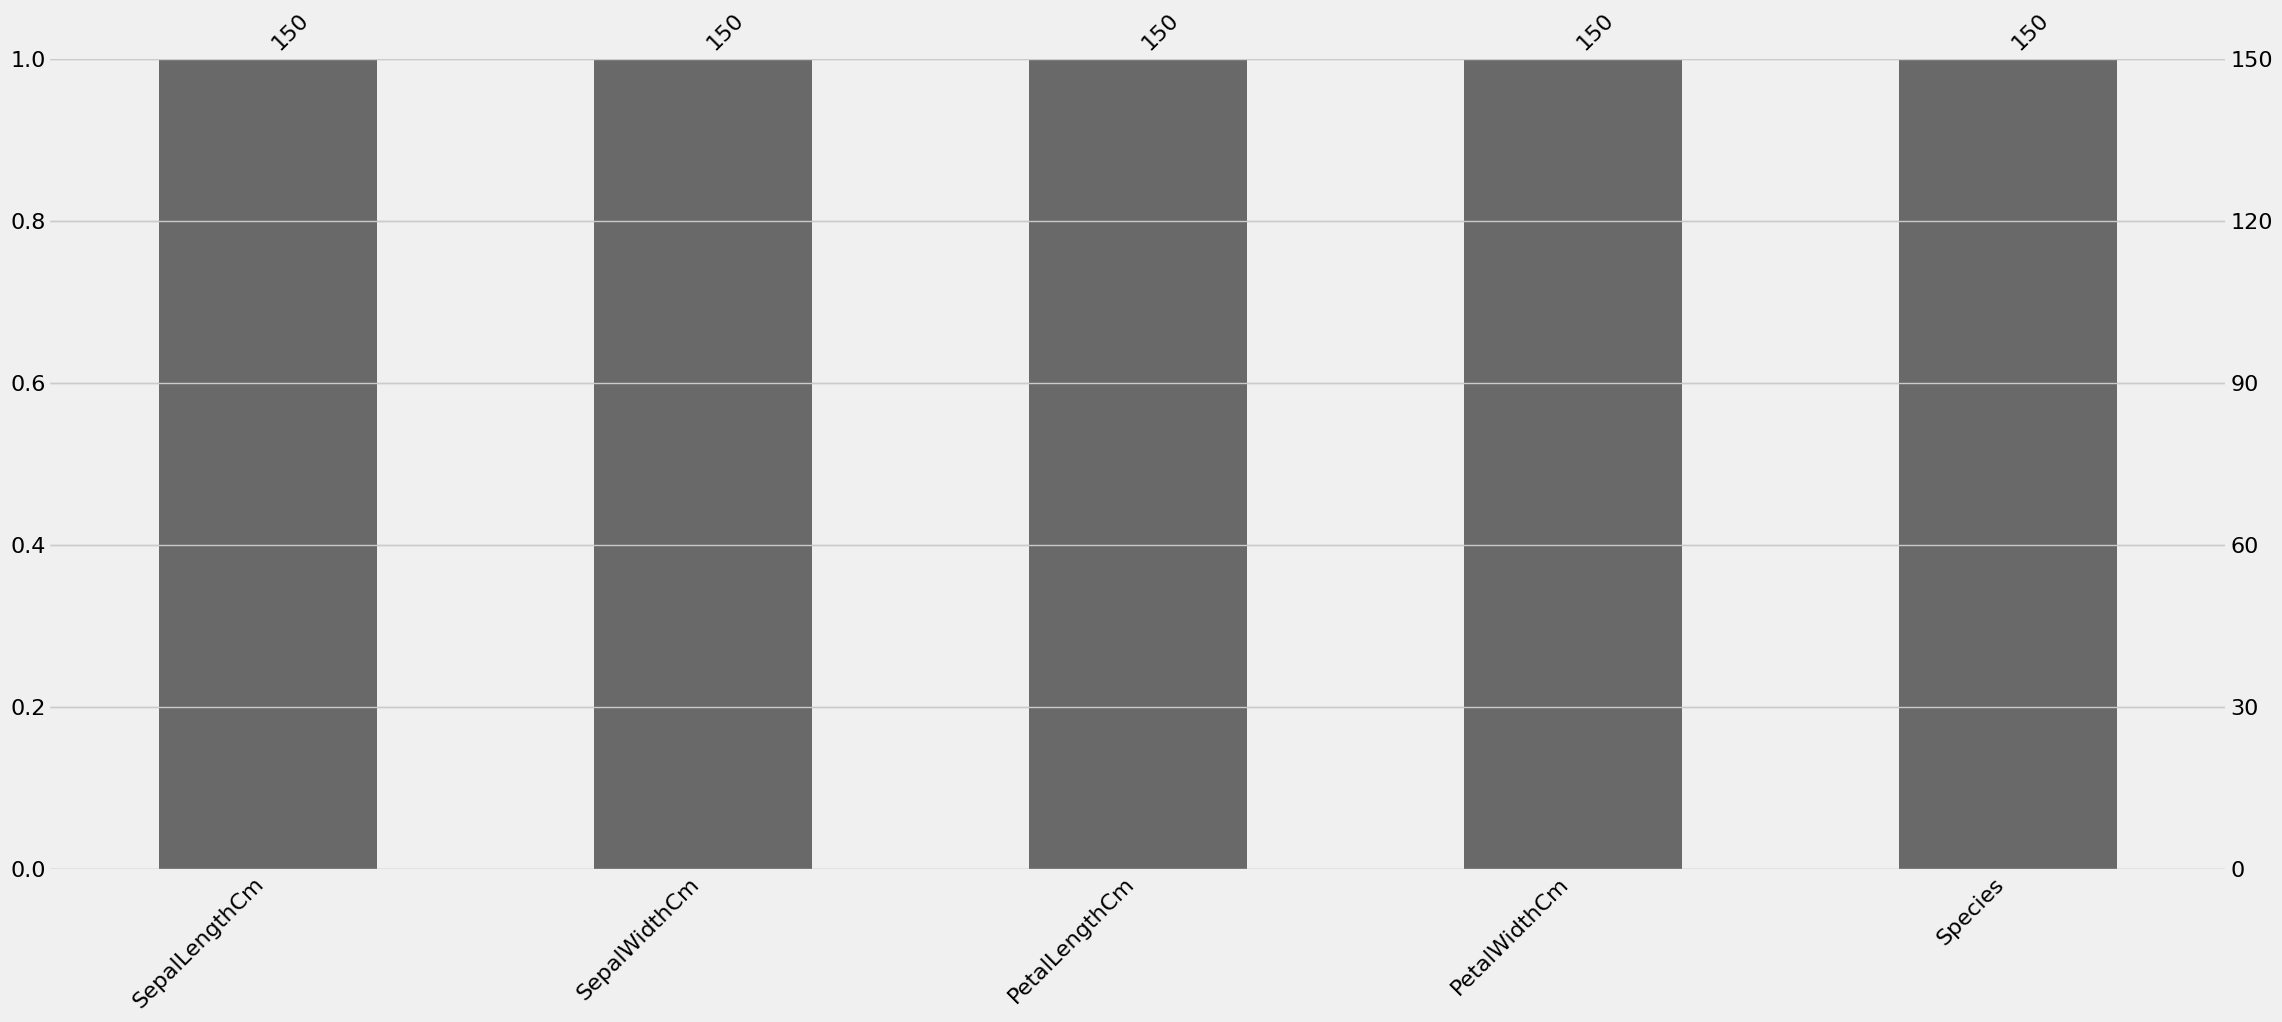

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
df.drop_duplicates(inplace=True)

# EDA

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

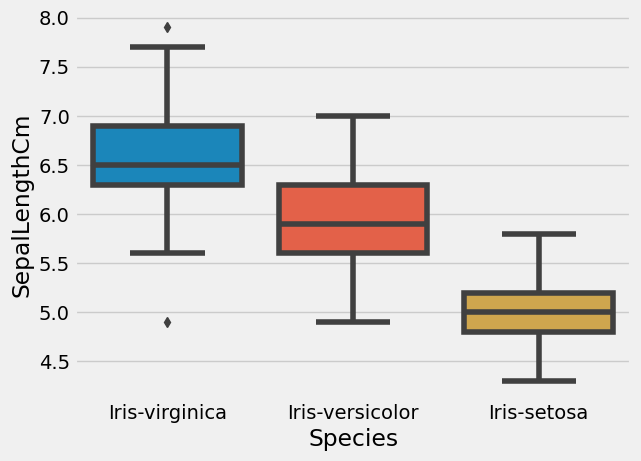

In [ ]:
# Relationship between species and sepal length
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

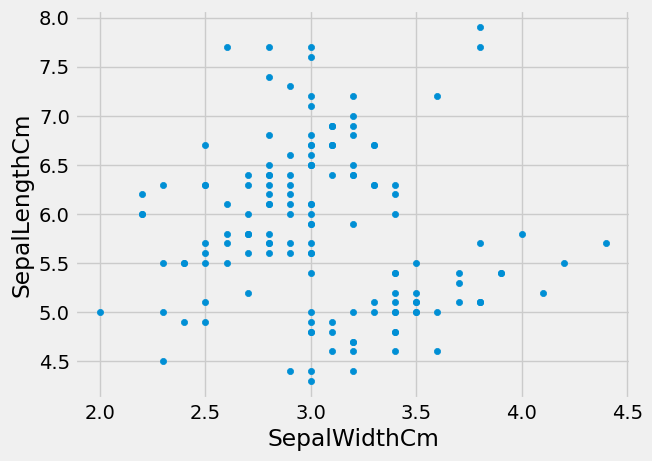

In [ ]:
# Relationship between species and sepal width
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

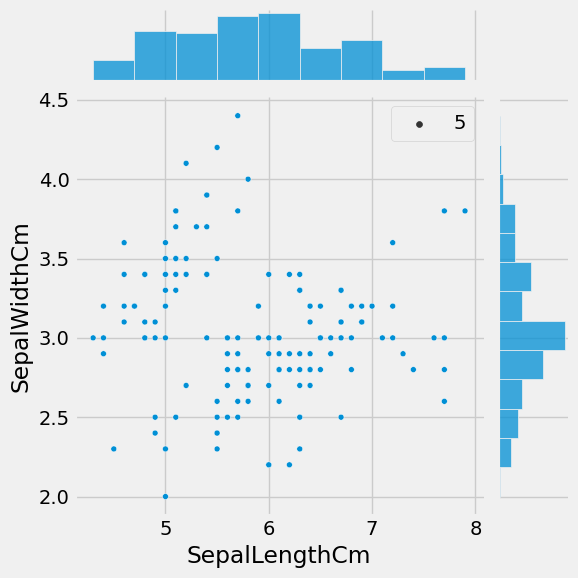

In [ ]:
# Relationship between sepal width and sepal length
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

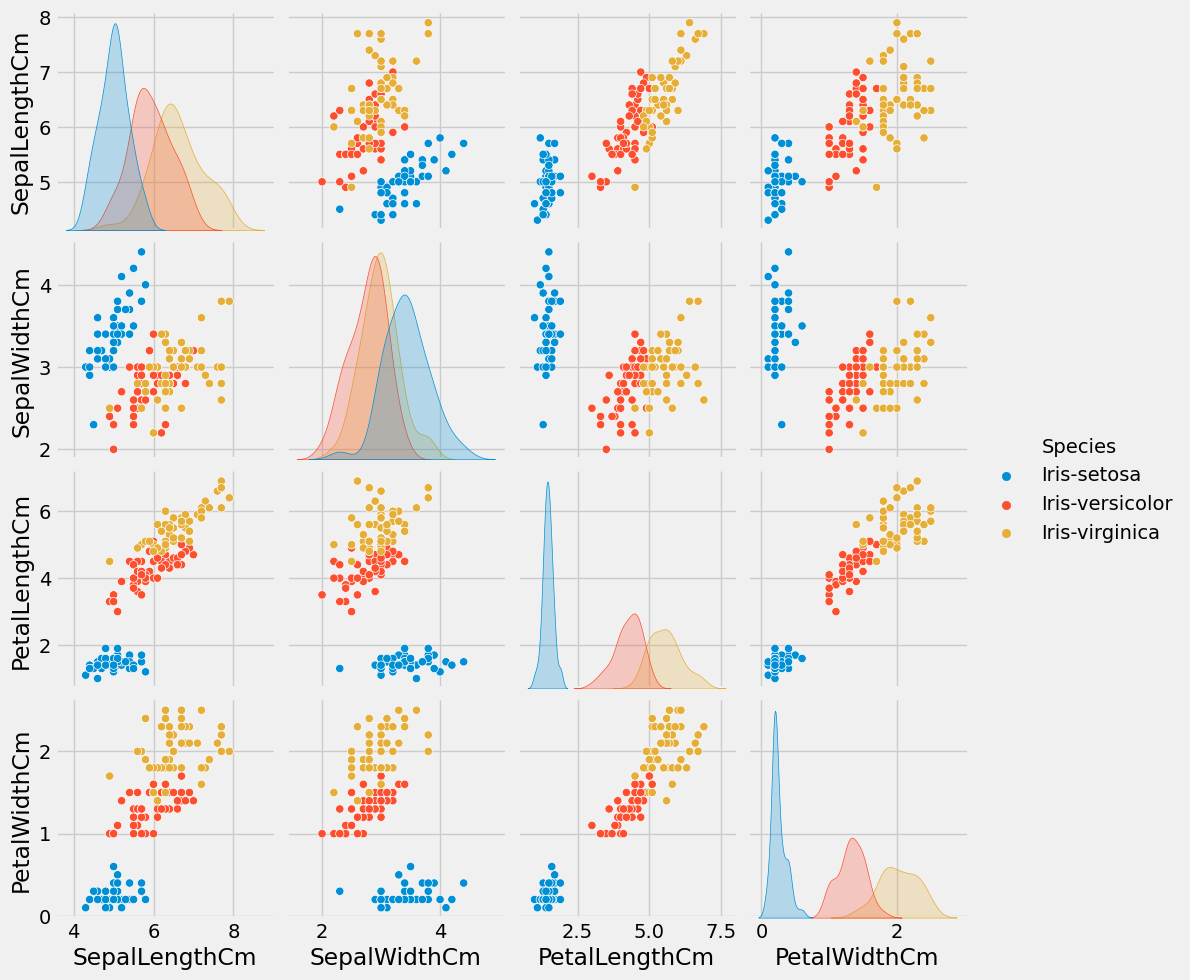

In [ ]:
# Pairplot
sns.pairplot(df, hue="Species")

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

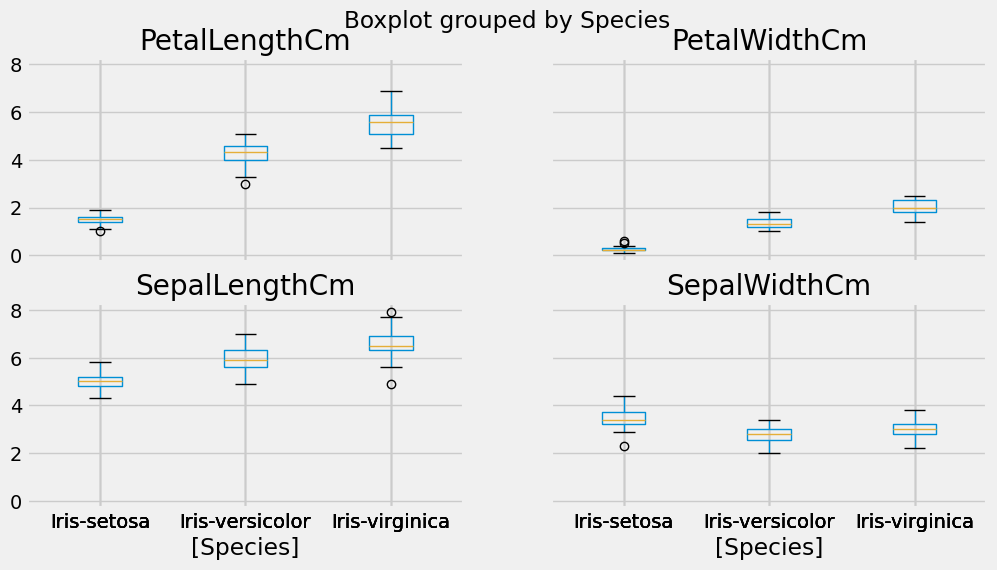

In [ ]:
# Boxplot
df.boxplot(by="Species", figsize=(12, 6))

<Axes: >

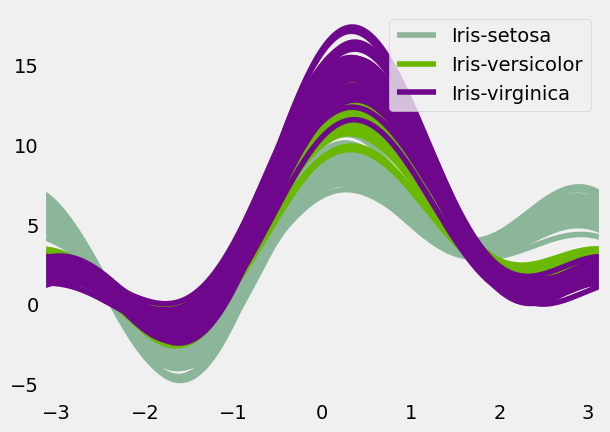

In [ ]:
# Andrews_curves
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

<Figure size 1500x1500 with 0 Axes>

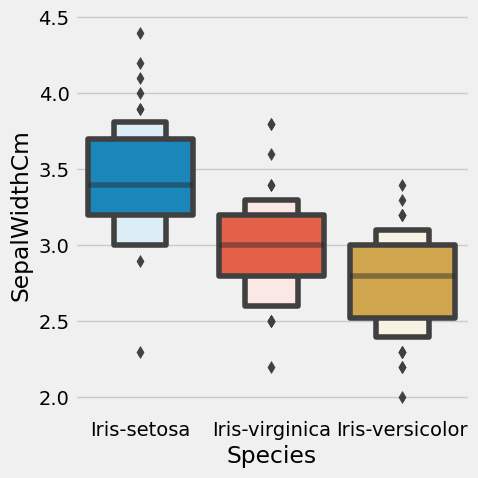

In [ ]:
# CategoricalPlot
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

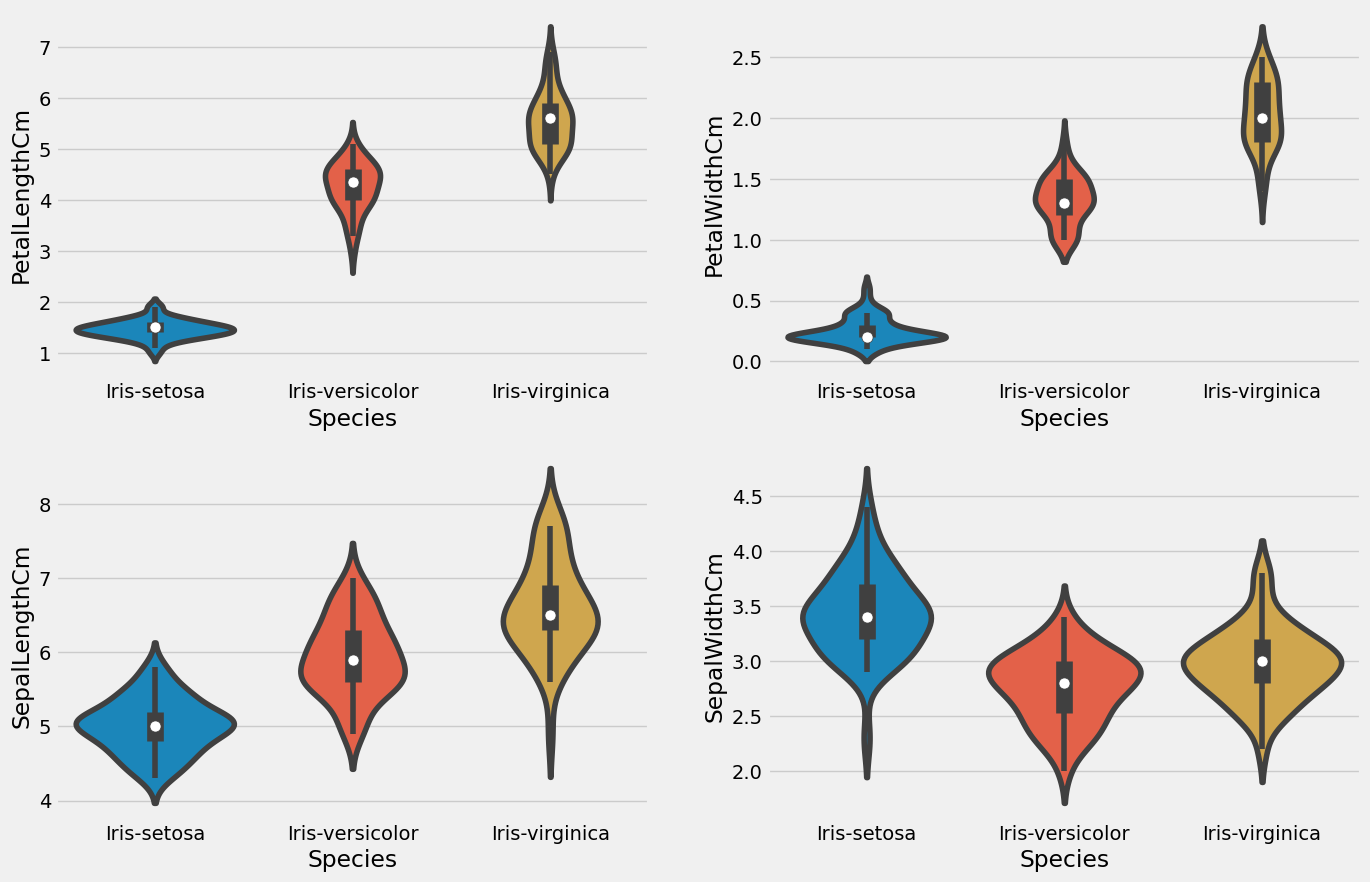

In [ ]:
# Violinplot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

#Neural Network

In [ ]:
X=df.drop('Species',axis=1)
y=df['Species']

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.Species)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [ ]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))
model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 2s 158ms/step - loss: 1.4830 - accuracy: 0.3235 - val_loss: 1.3338 - val_accuracy: 0.3333
Epoch 2/45
4/4 [==============================] - 0s 45ms/step - loss: 1.2816 - accuracy: 0.3235 - val_loss: 1.1690 - val_accuracy: 0.6444
Epoch 3/45
4/4 [==============================] - 0s 29ms/step - loss: 1.1320 - accuracy: 0.6569 - val_loss: 1.0660 - val_accuracy: 0.6444
Epoch 4/45
4/4 [==============================] - 0s 24ms/step - loss: 1.0411 - accuracy: 0.6275 - val_loss: 1.0044 - val_accuracy: 0.3333
Epoch 5/45
4/4 [==============================] - 0s 23ms/step - loss: 0.9993 - accuracy: 0.3333 - val_loss: 0.9742 - val_accuracy: 0.3333
Epoch 6/45
4/4 [==============================] - 0s 26ms/step - loss: 0.9702 - accuracy: 0.3333 - val_loss: 0.9460 - val_accuracy: 0.3333
Epoch 7/45
4/4 [==============================] - 0s 33ms/step - loss: 0.9397 - accuracy: 0.3431 - val_loss: 0.9091 - val_accuracy: 0.4444
Epoch 8/45
4/4 [==========

In [ ]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 15ms/step - loss: 0.4189 - accuracy: 0.9111


[0.41886070370674133, 0.9111111164093018]

In [ ]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 117ms/step
[[0.01464184 0.30630282 0.6790553 ]
 [0.01217903 0.29579479 0.6920262 ]
 [0.11485943 0.52493525 0.36020532]
 [0.07415593 0.48793793 0.43790615]
 [0.8921363  0.09033791 0.01752581]
 [0.07443982 0.52768564 0.39787453]
 [0.01242782 0.2514891  0.7360831 ]
 [0.01391628 0.26551402 0.7205698 ]
 [0.89571    0.08800725 0.01628275]
 [0.02948868 0.35861227 0.6118991 ]]


In [ ]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 2 1 1 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
history.history['accuracy']

[0.3235294222831726,
 0.3235294222831726,
 0.656862735748291,
 0.6274510025978088,
 0.3333333432674408,
 0.3333333432674408,
 0.343137264251709,
 0.5392156839370728,
 0.6470588445663452,
 0.8235294222831726,
 0.8039215803146362,
 0.7843137383460999,
 0.8235294222831726,
 0.9313725233078003,
 0.9313725233078003,
 0.7549019455909729,
 0.6764705777168274,
 0.686274528503418,
 0.8235294222831726,
 0.8333333134651184,
 0.7450980544090271,
 0.6960784196853638,
 0.6764705777168274,
 0.6960784196853638,
 0.8235294222831726,
 0.9607843160629272,
 0.9607843160629272,
 0.970588207244873,
 0.9509803652763367,
 0.9019607901573181,
 0.8235294222831726,
 0.8529411554336548,
 0.8921568393707275,
 0.9313725233078003,
 0.9607843160629272,
 0.970588207244873,
 0.970588207244873,
 0.9411764740943909,
 0.9215686321258545,
 0.9215686321258545,
 0.9313725233078003,
 0.9215686321258545,
 0.9117646813392639,
 0.9607843160629272,
 0.970588207244873]

In [ ]:
history.history['val_accuracy']

[0.3333333432674408,
 0.644444465637207,
 0.644444465637207,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.4444444477558136,
 0.6666666865348816,
 0.7555555701255798,
 0.9333333373069763,
 0.7777777910232544,
 0.8222222328186035,
 0.9111111164093018,
 0.9555555582046509,
 0.8222222328186035,
 0.6888889074325562,
 0.7555555701255798,
 0.7555555701255798,
 0.8222222328186035,
 0.7555555701255798,
 0.7555555701255798,
 0.7111111283302307,
 0.7111111283302307,
 0.7777777910232544,
 0.9555555582046509,
 0.9555555582046509,
 0.9777777791023254,
 0.9333333373069763,
 0.8888888955116272,
 0.8444444537162781,
 0.7777777910232544,
 0.8444444537162781,
 0.8444444537162781,
 0.8888888955116272,
 0.9333333373069763,
 0.9777777791023254,
 0.8888888955116272,
 0.8666666746139526,
 0.8888888955116272,
 0.8888888955116272,
 0.8888888955116272,
 0.8444444537162781,
 0.8888888955116272,
 0.9111111164093018,
 0.9111111164093018]

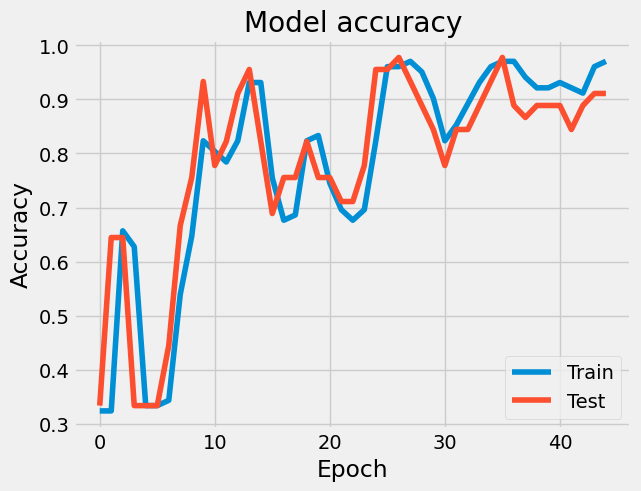

In [ ]:
plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()